### Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

### Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

### Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

### Matematik ve okuma notlarının dağılımı nedir?

### Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

abd= pd.read_csv("abd.csv")

abd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [2]:
abd.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [3]:
abd.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1492,1492
unique,1487,80
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,29


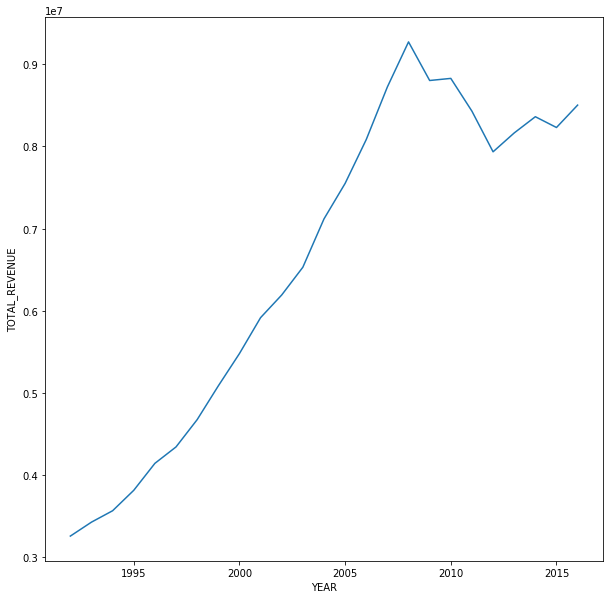

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x="YEAR", y="TOTAL_REVENUE",data=abd[abd.STATE=='ARIZONA']) 

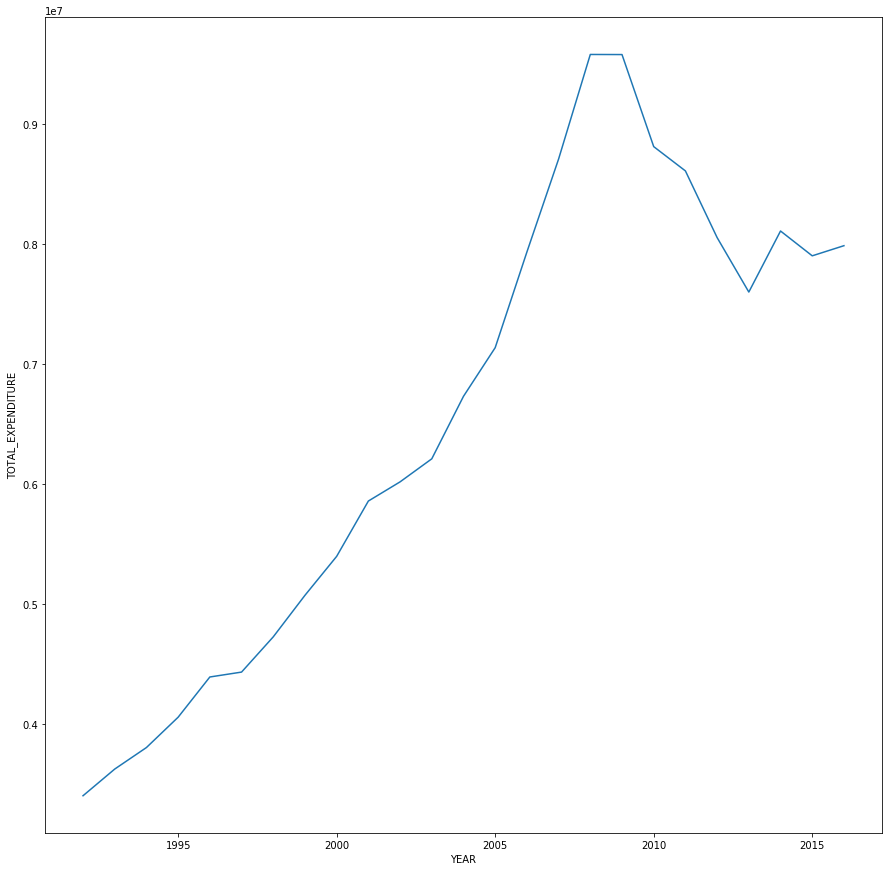

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="YEAR", y="TOTAL_EXPENDITURE",data=abd[abd.STATE=='ARIZONA']) 

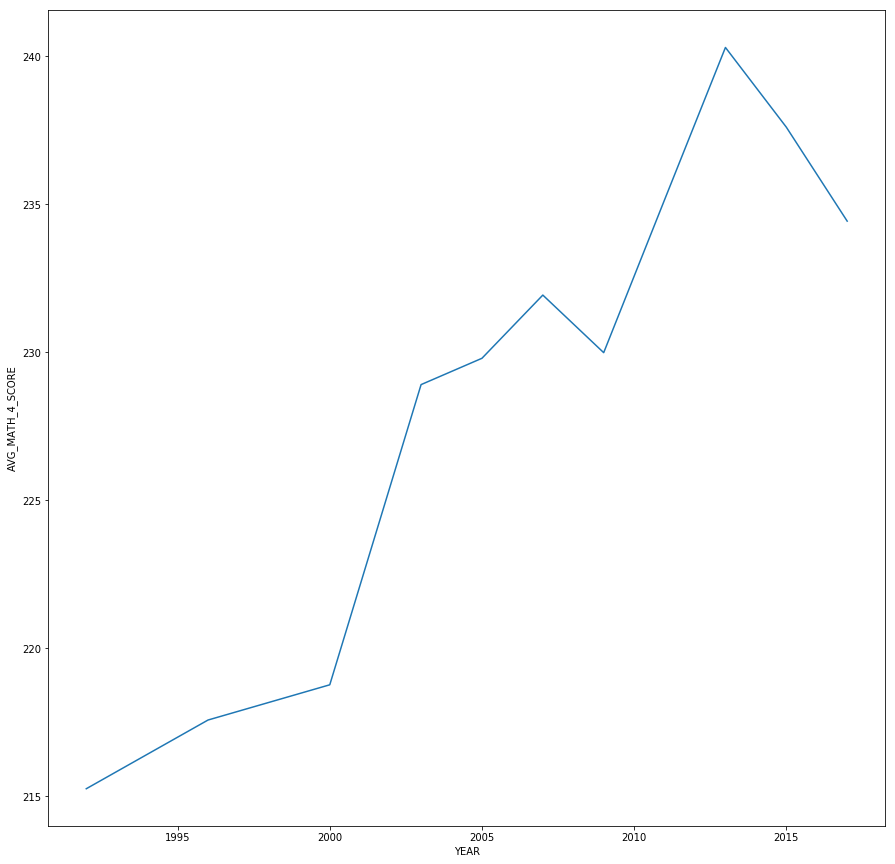

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="YEAR", y="AVG_MATH_4_SCORE",data=abd[abd.STATE=='ARIZONA'])

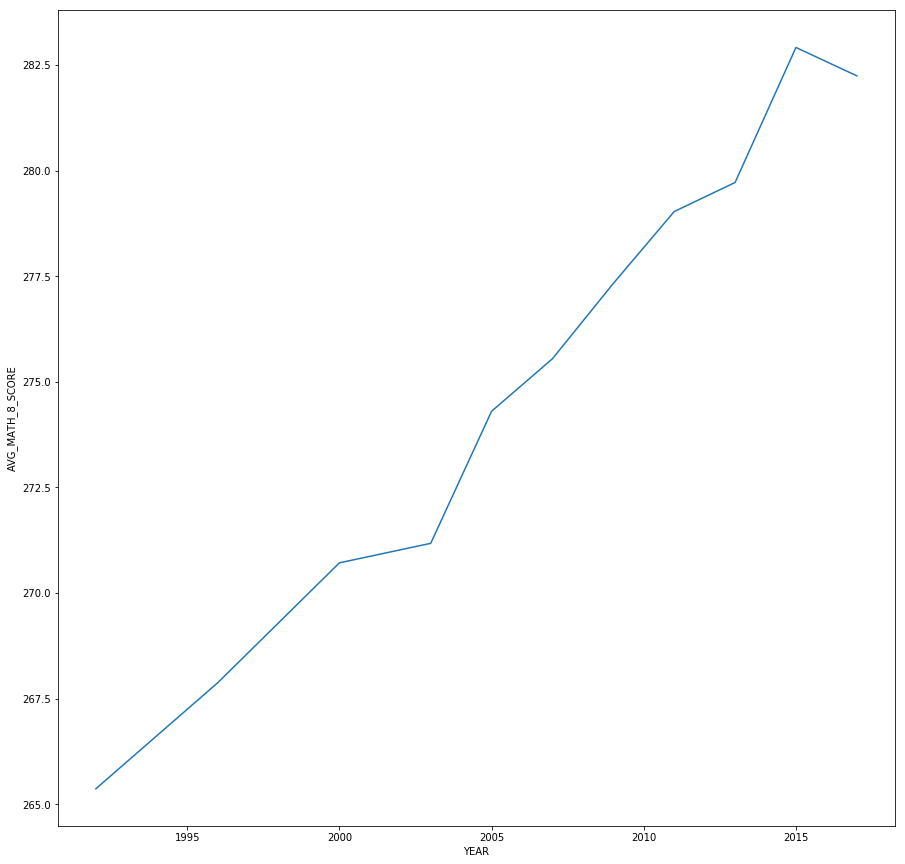

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="YEAR", y="AVG_MATH_8_SCORE",data=abd[abd.STATE=='ARIZONA'])

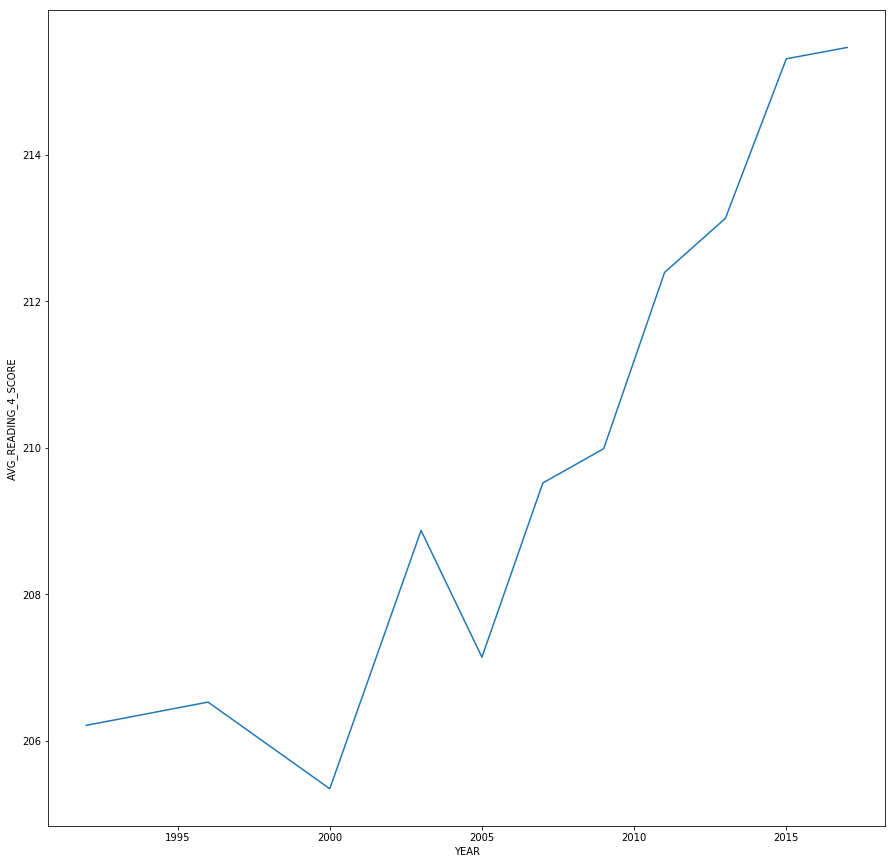

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="YEAR", y="AVG_READING_4_SCORE",data=abd[abd.STATE=='ARIZONA']) 

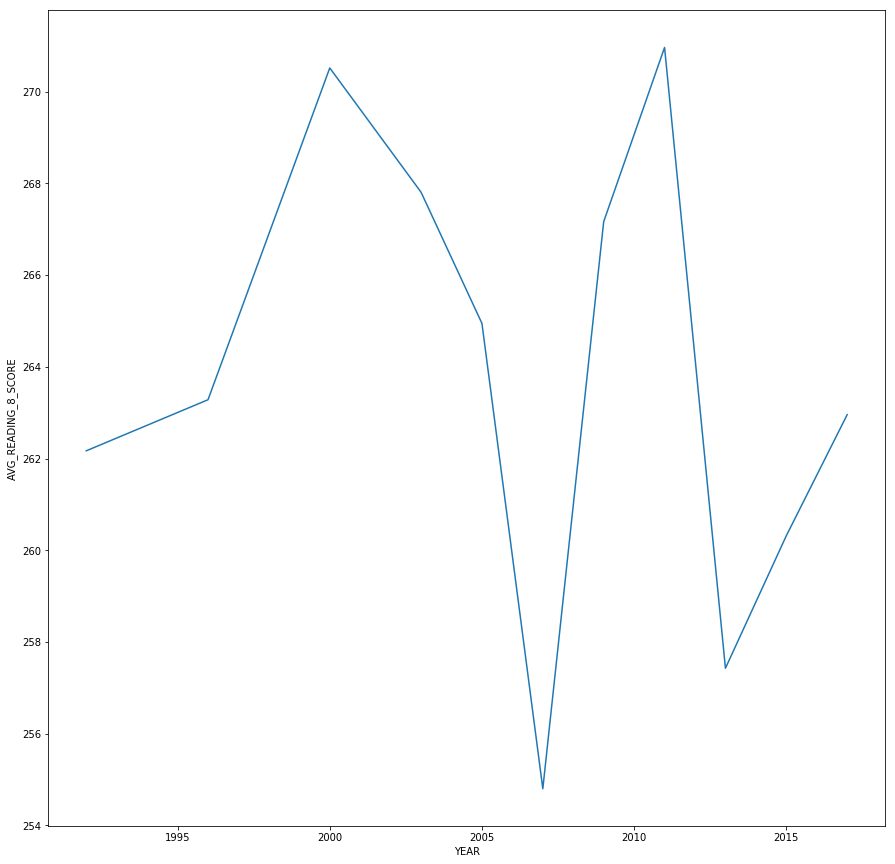

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="YEAR", y="AVG_READING_8_SCORE",data=abd[abd.STATE=='ARIZONA']) 


In [10]:
abd["ENROLL"].fillna(abd["ENROLL"].mean(), inplace=True)
abd["TOTAL_REVENUE"].fillna(abd["TOTAL_REVENUE"].mean(), inplace=True)
abd["FEDERAL_REVENUE"].fillna(abd["FEDERAL_REVENUE"].mean(), inplace=True)
abd["STATE_REVENUE"].fillna(abd["STATE_REVENUE"].mean(), inplace=True)
abd["LOCAL_REVENUE"].fillna(abd["LOCAL_REVENUE"].mean(), inplace=True)
abd["TOTAL_EXPENDITURE"].fillna(abd["TOTAL_EXPENDITURE"].mean(), inplace=True)
abd["INSTRUCTION_EXPENDITURE"].fillna(abd["INSTRUCTION_EXPENDITURE"].mean(), inplace=True)
abd["SUPPORT_SERVICES_EXPENDITURE"].fillna(abd["SUPPORT_SERVICES_EXPENDITURE"].mean(), inplace=True)
abd["OTHER_EXPENDITURE"].fillna(abd["OTHER_EXPENDITURE"].mean(), inplace=True)
abd["CAPITAL_OUTLAY_EXPENDITURE"].fillna(abd["CAPITAL_OUTLAY_EXPENDITURE"].mean(), inplace=True)
abd["GRADES_PK_G"].fillna(abd["GRADES_PK_G"].mean(), inplace=True)
abd["GRADES_KG_G"].fillna(abd["GRADES_KG_G"].mean(), inplace=True)
abd["GRADES_4_G"].fillna(abd["GRADES_4_G"].mean(), inplace=True)
abd["GRADES_8_G"].fillna(abd["GRADES_8_G"].mean(), inplace=True)
abd["GRADES_12_G"].fillna(abd["GRADES_12_G"].mean(), inplace=True)
abd["GRADES_1_8_G"].fillna(abd["GRADES_1_8_G"].mean(), inplace=True)
abd["GRADES_9_12_G"].fillna(abd["GRADES_9_12_G"].mean(), inplace=True)
abd["GRADES_ALL_G"].fillna(abd["GRADES_ALL_G"].mean(), inplace=True)
abd["AVG_MATH_4_SCORE"].fillna(abd["AVG_MATH_4_SCORE"].mean(), inplace=True)
abd["AVG_MATH_8_SCORE"].fillna(abd["AVG_MATH_8_SCORE"].mean(), inplace=True)
abd["AVG_READING_4_SCORE"].fillna(abd["AVG_READING_4_SCORE"].mean(), inplace=True)
abd["AVG_READING_8_SCORE"].fillna(abd["AVG_READING_8_SCORE"].mean(), inplace=True)
abd.isna().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

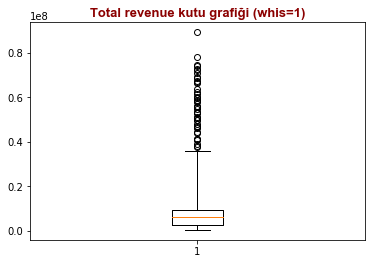

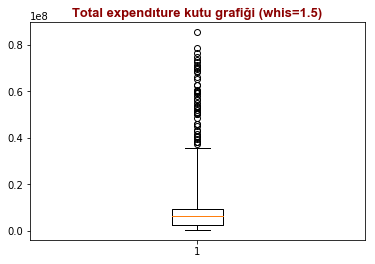

In [12]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(abd["TOTAL_REVENUE"],whis=4)
plt.title("Total revenue kutu grafiği (whis=1)", fontdict=baslik_font)
plt.show()

plt.boxplot(abd["TOTAL_EXPENDITURE"],whis=4)
plt.title("Total expendıture kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()


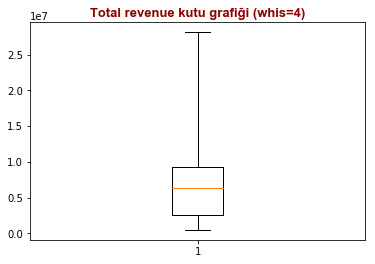

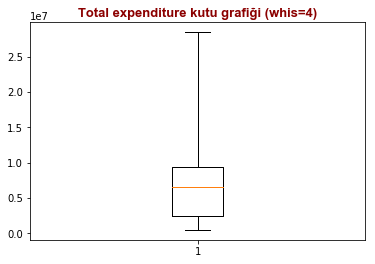

In [13]:
from scipy.stats.mstats import winsorize

winsorize_total_revenue = winsorize(abd["TOTAL_REVENUE"], (0, 0.05))

winsorize_total_revenue


plt.boxplot(winsorize_total_revenue,whis=4)
plt.title("Total revenue kutu grafiği (whis=4)", fontdict=baslik_font)
plt.show()

winsorize_total_expenditure = winsorize(abd["TOTAL_EXPENDITURE"], (0, 0.05))

winsorize_total_expenditure


plt.boxplot(winsorize_total_expenditure,whis=4)
plt.title("Total expenditure kutu grafiği (whis=4)", fontdict=baslik_font)
plt.show()

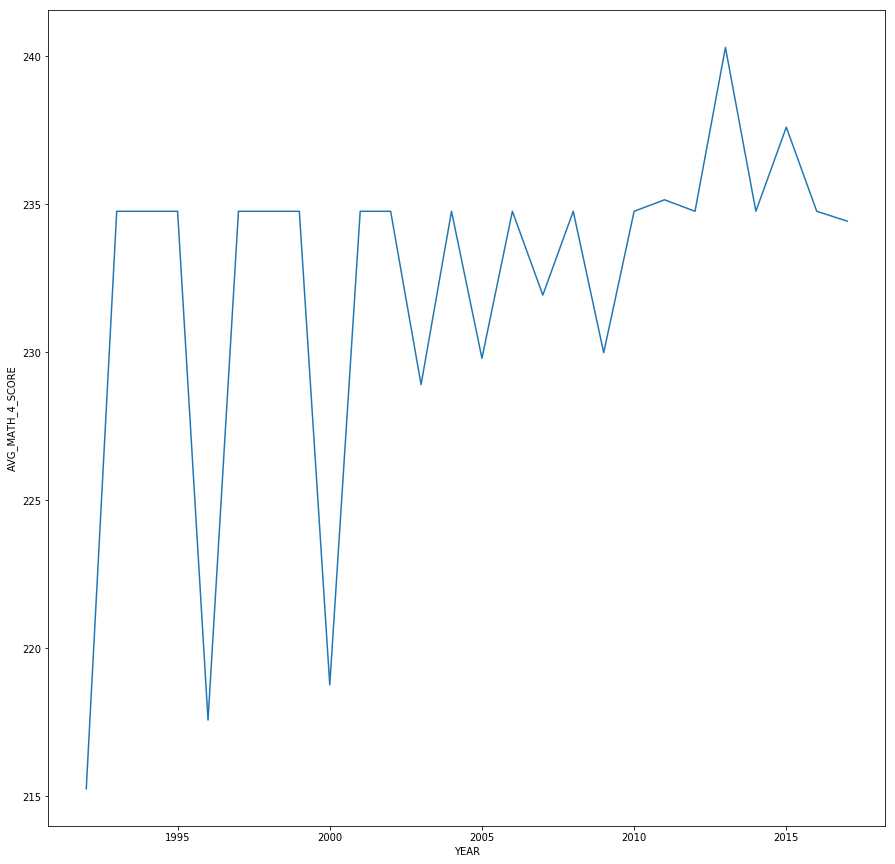

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="YEAR", y="AVG_MATH_4_SCORE",data=abd[abd.STATE=='ARIZONA'])

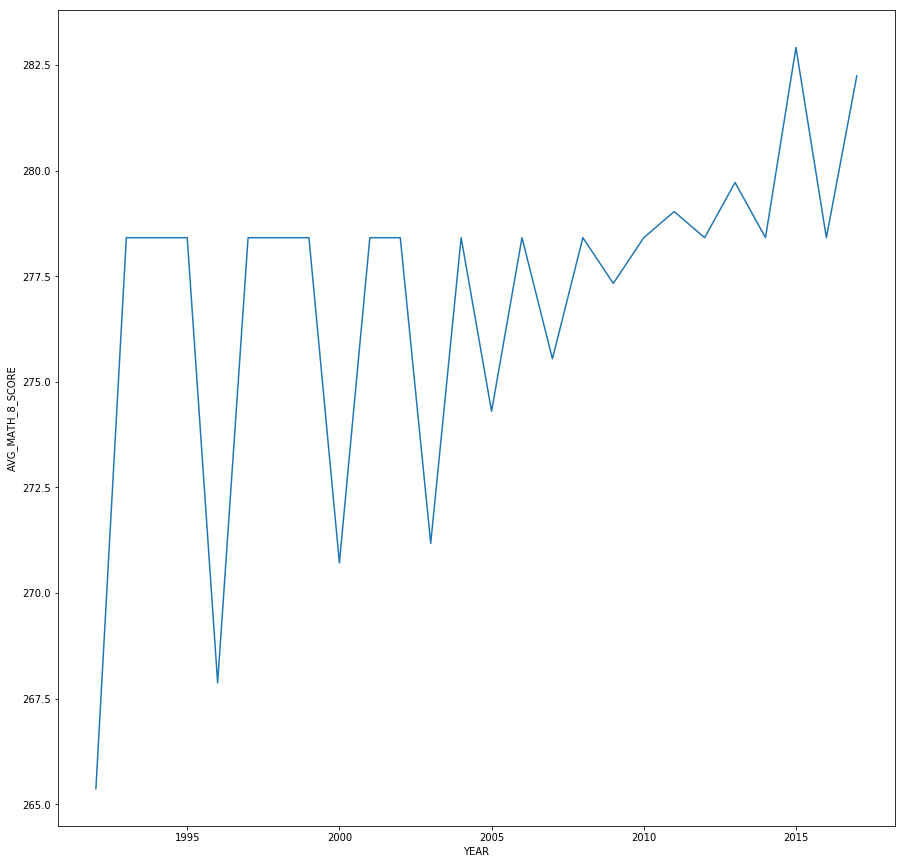

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="YEAR", y="AVG_MATH_8_SCORE",data=abd[abd.STATE=='ARIZONA'])

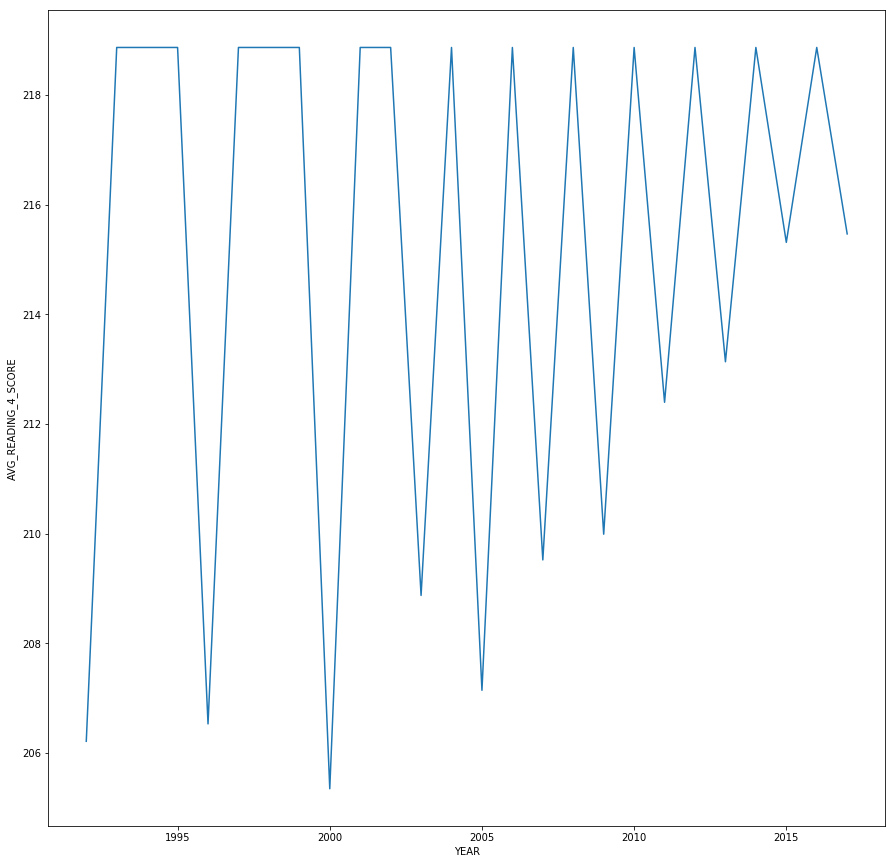

In [20]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="YEAR", y="AVG_READING_4_SCORE",data=abd[abd.STATE=='ARIZONA'])

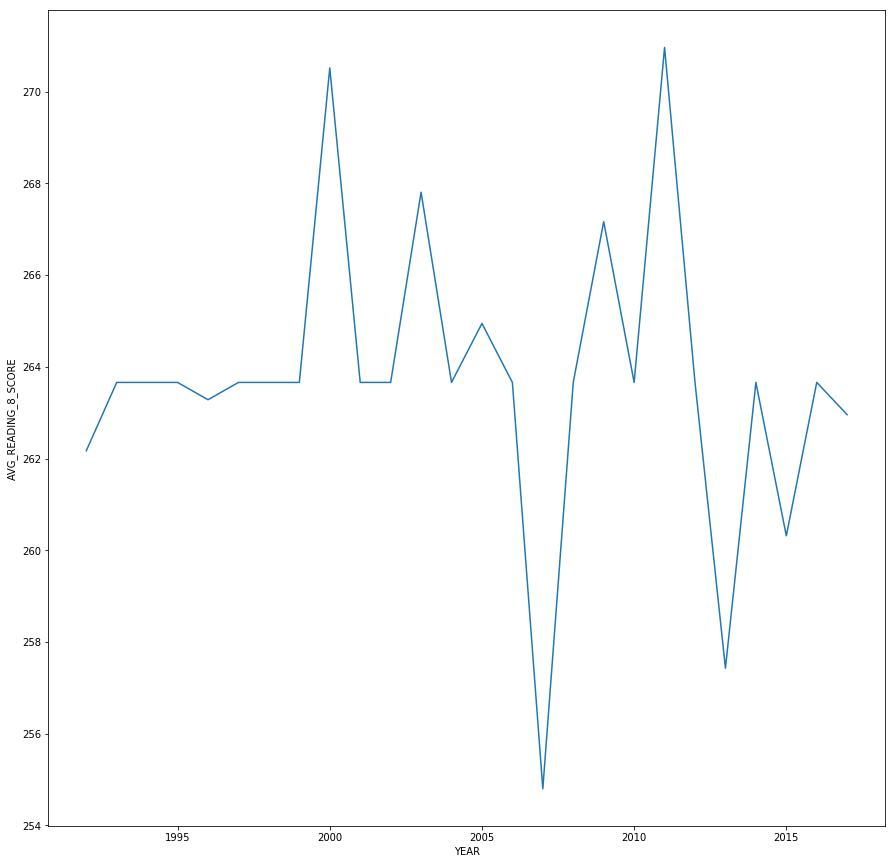

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="YEAR", y="AVG_READING_8_SCORE",data=abd[abd.STATE=='ARIZONA'])